In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# <b><font color="red"> LAB 04: Horizontal Motion under Constant Force

---

<b><font color = blue> Double-Click (or enter) to provide the information below

First Name:

Last Name:

Lab Group: [Table #]

Lab Section: [Day] [Time]

Purdue Username (NOT your PUID):



---



**Learning Objectives**

- iterate the design for AGV;
- experiment with accelerated motion of the cart;
- simulate accelerated motion of the cart.

# 0. Pre-lab Notes

Welcome to PHYS 172 Lab 04! This week, we apply the Momentum Principle in more detail.

# 1. The AGV Design Metrics

Recall the design problem from previous two labs.

A partner shipping company is requesting your team to develop an algorithm to remotely control its Automated Guided Vehicles (AGVs) at their new warehouse in a **timely** and **safe** manner. They will review your proposal and send the algorithm to a team of expert programmers who will implement it in Python. They will need a visual representation (e.g., flowchart) of your algorithm with a written description of how it works and any additional information that you consider relevant.

Design problems are open-ended, ill-structured, and complex in nature. Thus, we started framing more our problem by identifying:
- the shipping company as the **client**;
- the company programmers as the **users**;
- the warehouse workers and the AGV maintenance team as **stakeholders** (in addition to the client and users).

Last week, we explored the design criteria and constraints that our algorithm must meet. Among others, there are 2 key ones:
- each trip of an AGV must take minimum time;
- every move must be safe for the stakeholders at all times.

Criteria and contraints should be measurable through **metrics**. Let’s explore how we can measure these two metrics.

## 1.1. The Safety Constraint

The parameters of AGV robots are provided:
- Mass: 145 kg
- Dimensions: 75×60×30 cm
- Maximum load: 340 kg

Refer to Lab 03 for the **maximum** allowed **momentum** of an AGV inside the warehouse. Then, using the mass of the AGV itself and that of the maximum load it can carry, calculate the maximum allowed speed.

EDIT CELL(S) BELOW

The safety speed limit of the AGV without any load: ? (mph).

The safety speed limit of the AGV without the max. load: ? (mph).

EDIT CELL(S) ABOVE

## 1.2. The Time Criterion

Given the layout of the warehouse area, how fast can an AGV bring an item from the loading area to the work station? Assume that the robot leaves the loading area at one corner of the $25 \times 25$  $m^2$ square space and reaches the farthest work station #1 at the diagonally opposite corner. And it's carrying the maximum load at the constant speed (refer to the previous exericse 1.1). This will provide an **upper bound** on the travel time.

Note: AGVs can move only in straight lines either parallel or perpendicular to a given side of the square.

<img src="https://raw.githubusercontent.com/phys172/fall2022/main/images/phys172_lab04_fig4.png" alt="AGV" height="500" width="850">

EDIT CELL(S) BELOW

Show your calculations (briefly) and explain your reasoning here.

EDIT CELL(S) ABOVE

# 2. The Fan-Cart Experiment

In this part, we will measure the motion of Smart Cart under the influence of external force. PASCO Smart Fan Accessory provides the source of that force: it blows the air out and, in turn (momentum principle!), pushes the cart forward. Please follow the setup instructions below, collect the data and analyze the graphs generated by them.

<img src="https://raw.githubusercontent.com/phys172/fall2022/main/images/phys172_lab04_fig3.png" height="500" width="800">

## 2.1. The Fan-Cart Setup

Find a Smart Fan Accessory (the Fan from here on) in a large cardboard box, on the instructor's table. Pick a Cart and attach the Fan to it and plug in. The Cart with the Fan connected to it represent a single composite body, a whole. We refer to it as "the Fan-Cart".

On the PASCO Capstone display, you should see icon "Smart Fan Accessory". Click it to connect the Fan together with the Cart.

- In Capstone, in the Smart Fan's options, you can click "On" and "Off" buttons. Use them to turn the Fan on and off.

- Don't use the physical button located on the Fan itself. If you push that button accidentally, then hold it to turn off the fan.

- You can control the power of the Fan by moving the sliding  bar under "Thrust" or typing a specific value for Thrust directly. Use either one to set the thrust of the Fan to 50.

- When the Cart is moving, make sure the orientation of the Fan it is in the positive (+X) direction. You can reverse the direction of the air flow coming from the Fan by changing the sign of Thrust. Set it to -50 if you need to do that.

<img src="https://raw.githubusercontent.com/phys172/fall2022/main/images/phys172_lab04_fig1.PNG" height="300" width="400">

---

<img src='https://raw.githubusercontent.com/phys172/fall2022/main/images/phys172_lab04_fig2.png' height="250" width="400">

## 2.2. The Fan-Cart Data

Start the Fan-Cart at rest, from the open end of the Track (to avoid magnetic repulsion!). Turn on the Thrust and start recording. Let the Fan-Cart travel the full length of the Track but stop recording before it hits the End Stop. Do not let the Cart fall off the Track at any moment.

Perform 3-5 trials and choose the best Run you obtained. Export the Position, Velocity, and Acceleration Data corresponding to that Run #. Name your data file `phys172_lab04_data.csv` and upload it to your Notebook.

Build a table of 4 columns for Time (s), Position (m), Velocity (m/s), and Acceleration (m/s^2).

In [ ]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 4)
pasco_data = pd.read_csv('phys172_lab04_data.csv')
#pasco_data = pasco_data.dropna()
display(pasco_data)

,Time (s) Run #1,Position (m) Run #1,Velocity (m/s) Run #1,Acceleration (m/s²) Run #1
0,0.00,0.0124,NaN,NaN
1,0.05,0.0166,0.087,NaN
2,0.10,0.0211,0.092,0.093
3,0.15,0.0258,0.097,0.086
4,0.20,0.0308,0.101,0.082
...,...,...,...,...
69,3.45,0.7493,0.325,0.034
70,3.50,0.7656,0.327,0.044
71,3.55,0.7819,0.329,NaN
72,3.60,0.7985,0.333,NaN


Plot the Position, Velocity, and Acceleration Graphs based on your data.

In [ ]:
col_names = []
for col in pasco_data.columns:
  col_names.append(col)

time_data = pasco_data[col_names[0]]
pos_data = pasco_data[col_names[1]]
vel_data = pasco_data[col_names[2]]
acc_data = pasco_data[col_names[3]]

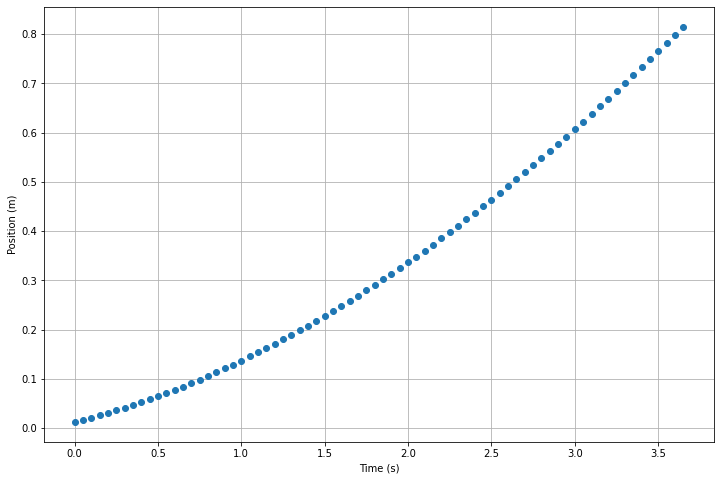

In [ ]:
plt.figure(1, figsize=(12, 8))
plt.plot(time_data, pos_data, 'o')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid()

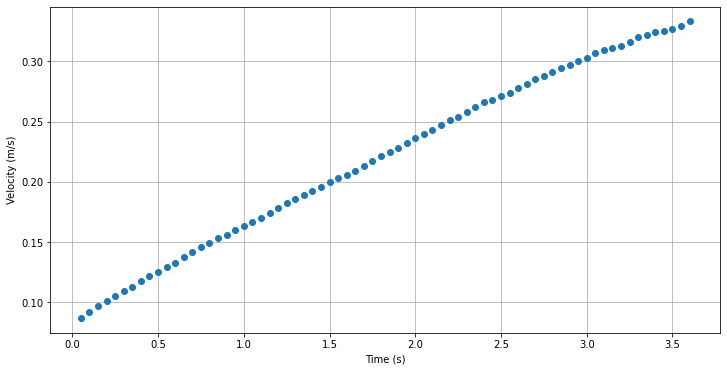

In [ ]:
plt.figure(2, figsize=(12, 6))
plt.plot(time_data, vel_data, 'o')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid()

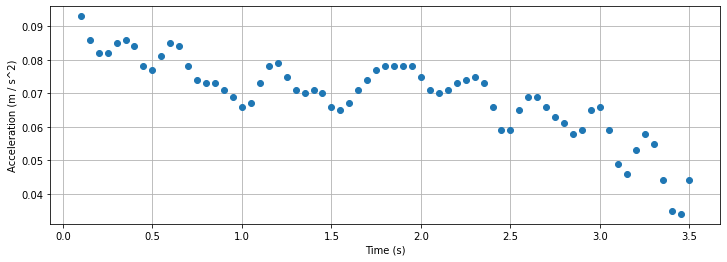

In [ ]:
plt.figure(3, figsize=(12, 4))
plt.plot(time_data, acc_data, 'o')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m / s^2)')
plt.grid()

## 2.3. The Fan-Cart Model

The following code builds a computational model of the Fan Cart. It defines a digital object `FanCart` with the properties corresponding to the mass, position, and momentum of the real Fan Cart. Run it and proceed if you don't get any error messages.

In [ ]:
class FanCart(object):
  """This is a class of objects Fan Cart."""

  def __init__(self, initPos, initVel):
    """Initialize the built-in parameter mass and the initial values for 
       position and velocity."""

    massCart = (245 + 23.6) / 1000 #mass of the cart with the bumper (kg)
    massFan = 280 / 1000 #mass of the fan with the batteries (kg)
    self._mass = massCart + massFan #the total mass of the Fan Cart
    self._pos = initPos
    self._mom = self._mass * initVel

  def get_mass(self):
    """Get the mass of the Fan Cart"""
    return self._mass

  def move(self, Fnet, initTime, finTime): # This function defines a model of the motion i.e. position vs. time based on the the net force, initial and final time.  You will use this model below.
    """Get the record of the position of the Fan Cart after moving 
       from start to finish (initTime --> finTime) under the influence of 
       the force Fnet."""

    m = self._mass
    x = self._pos
    p = self._mom
    t = initTime
    numIter = 100
    timeStep = (finTime - initTime) / numIter

    moveTime = [t]
    movePos = [x]
    for i in range(numIter):
      p += Fnet * timeStep #momentum update
      x += (p / m) * timeStep #position update
      t += timeStep
      moveTime.append(t)
      movePos.append(x)

    return np.array(moveTime), np.array(movePos)

The previous code cell only built a general object called "FanCart". Next, you need to specify your particular model below. Let's call it `myCart`. It is defined by the call `FanCart(...)` which takes in 2 arguments: the initial position `initPos` (m) and the initial velocity `initVel` (m/s) of your Fan Cart. Insert the corresponding values from your data instead of the numbers provided.

EDIT CELL(S) BELOW

In [ ]:
#Create your FanCart object:
myCart = FanCart(initPos=0.0166, initVel=0.087)  # Change the numbers for initial Position and initial Velocity to match your data.

EDIT CELL(S) ABOVE

Having done that, we can simulate the motion of the model "myCart". The following code generates data for the position of the model using function `move(...)`. There are 3 arguments: the force `Fnet` (N) acting on the cart, the initial time `initTime` (s) of motion, and the final time `finTime` (s). For the last two, please insert the initial and final time values from your PASCO data similarly to the previous exercise. But you will need to measure the force of the Fan for the first argument. 

Use the force sensor on your desk to find the force with which the Fan pushes the Cart (at the corresponding 50% of power that was used for experiment). Replace the corresponding number in the code cell below. HINT: obtain the average value of the force from Capstone's Force graph.

EDIT CELL(S) BELOW

In [ ]:
#Move your FanCart object and generate the data:
model_time, model_pos = myCart.move(Fnet=0.03758, initTime=0.05, finTime=3.60) 
###Change Fnet to the average value of the force of the fan as measured by the force sensor.
###Change the initial and final time to match your data.

EDIT CELL(S) ABOVE

To test your model in comparison with the experimental data, plot the Position graph below. If the discrepancy is significant, then go back to the previous two steps and check your parameters (force) and initial values (time, position, and velocity).

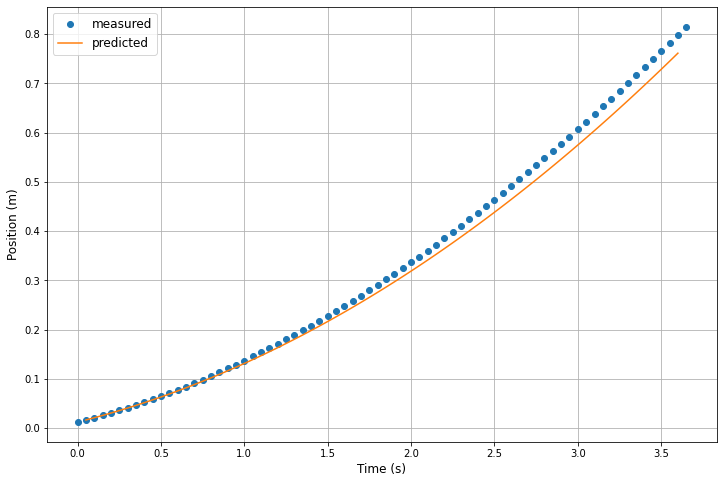

In [ ]:
plt.figure(4, figsize=(12, 8))
plt.plot(time_data, pos_data, 'o', label='measured')
plt.plot(model_time, model_pos, label='predicted')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Position (m)', fontsize = 12)
plt.legend(loc='best', fontsize=12)
plt.grid()

<font color="red">**Put the Cart back** to its charging station and leave it **plugged in**. Leave the Force sensor at your desk also plugged in. Put the Fan back to its box at the instructor's table.

# 3. The AGV Flowchart Update

Refer to your flowchart from Lab 03. Modify it now to account for the ideas explored in this lab.
- Does your flowchart meet the criteria and constraints from Part 1?
- Does it incorporate the metrics defined for those requirements?

We can not assume the programmers will have an exhaustive knowledge about physics. Add to your flowchart or in a separate paragraph any principle and/or concept(s) that the programmers need to include when using your flowchart.

What assumptions/approximations are you making to assure your algorithm will work properly?

EDIT CELL(S) BELOW

Attach your udpated flowchart here.

Add your written comments here.

EDIT CELL(S) ABOVE

# 4. Before You Leave

**Reach out to your TA** to confirm your work for today. 

**Clean up your lab table** before you leave. Make sure to sign out of the lab PC. And don't forget your personal belongings.

# 5. Post-lab Notes

Please follow the directions on Brightspace for **uploading this Notebook in both IPYNB and PDF format**.  Please note that before you print to PDF you must **expand ALL** of the cells so that your responses are visible in the PDF.